In [2]:
##Author: panthadeep_b; Time: 19.33 IST - 22Feb'25
##WAP to implement Support Vector Machine (SVM) classifier

import sys
import pandas as pd
import numpy as np
from array import *
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc 
import seaborn as sns

data_set = pd.read_csv("Iris.csv");
##print(data_set);

x = data_set.iloc[:,[1,3]];
y = data_set.iloc[:,5];

print("X:\n",x);
print("Y:\n",y);

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0); 
 
scale = StandardScaler()    
x_train = scale.fit_transform(x_train)    
x_test = scale.transform(x_test)  

#print("X_train:\n",x_train);
#print("Y_test:\n",y_test);

model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)  


#***Predicting the test set result****  
y_pred = model.predict(x_test) 

#Creating the Confusion matrix  
conf_mat = confusion_matrix(y_test, y_pred)  
print(conf_mat);

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


X:
      sepal width  petal width
0            3.5          0.2
1            3.0          0.2
2            3.2          0.2
3            3.1          0.2
4            3.6          0.2
..           ...          ...
145          3.0          2.3
146          2.5          1.9
147          3.0          2.0
148          3.4          2.3
149          3.0          1.8

[150 rows x 2 columns]
Y:
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class-encode, Length: 150, dtype: int64
[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
Confusion Matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       

/tmp/ipykernel_28994/2668658901.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


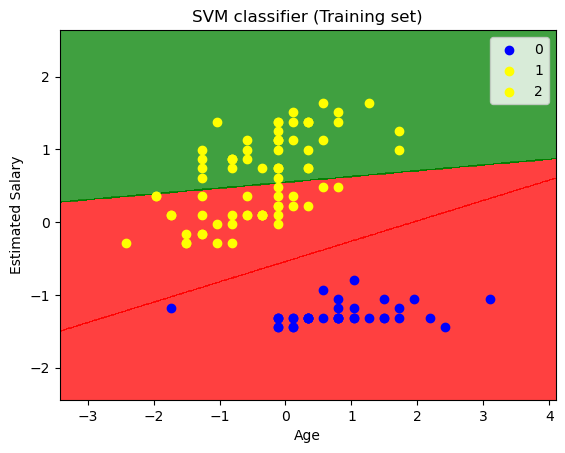

In [21]:
#from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  

plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('blue', 'yellow'))(i), label = j)  

plt.title('SVM classifier (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

